<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/ISSvsSteven/blob/main/ISSvsSteven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from PIL import Image
import os
from urllib.request import urlopen
import io
import seaborn as sns
import random

# Helper libraries
from IPython.core.pylabtools import figsize
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from urllib.error import HTTPError
import sys

In [17]:
# TO SHOW IMAGES PAIR

def magick(issaaaa, steeevaaa):
    global classes
    
    plt.figure(figsize=(8,8))

    for j, i in enumerate([issaaaa, steeevaaa]):
        plt.subplot(1, 2, j + 1)
        plt.title(classes[i[1]])
        plt.imshow(i[0])
        plt.axis('off')

In [18]:
# TO DOWNLOAD DATASET AND CHANGE SIZE

def download_set(data_path, class_name):
    global img_size
    only_img_list = []

    for img in os.listdir(data_path):
        img_arr =  cv2.imread(os.path.join(data_path, str(img)))
        # color channel conversion and circumcision))
        img_arr = cv2.cvtColor(cv2.resize(img_arr, dsize=(img_size, img_size)), cv2.COLOR_BGR2RGB)
        only_img_list.append(img_arr)

    return only_img_list

In [19]:
img_size = 256

/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC
602 0
/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена
520 1


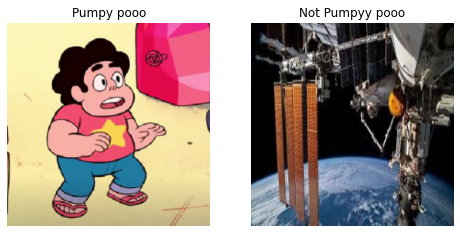

In [20]:
# FULL DATASET

full_ISS_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/MKC"  # 602
full_Steven_dir = "/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена"  # 520

directory = [full_ISS_dir, full_Steven_dir]

classes = ['Not Pumpyy pooo', 'Pumpy pooo']

full_img_list = []
full_base = []

img_size = 256

train_base = []
test_base = []
temp_arr = []

only_img_list_tr = []
only_img_list_tt = []

for d_set_path in directory:
    print(d_set_path)  # debag
    os.chdir(d_set_path)
    current_class = 0 if '/MKC' in d_set_path else 1
    full_img_list.extend(download_set(os.getcwd(), current_class))
    temp_arr = download_set(os.getcwd(), current_class)
    print(len(temp_arr), current_class)  # debag
    full_base.extend([[i, current_class] for i in temp_arr])

magick(full_base[800], full_base[4])

random.shuffle(full_base)

In [ ]:
print(type(full_base[0][0]))

<class 'numpy.ndarray'>


In [21]:
# BUILDING A RIGHT ARRAY MODE

random.shuffle(full_base)

x_full = []
y_full = []

x_train = []
y_train = []

x_test = []
y_test = []

for img, cls in full_base:
    x_full.append(img)
    y_full.append(cls)

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1, img_size, img_size, 3)
x_train = x_train/255

x_test = x_test.reshape(-1, img_size, img_size, 3)
x_test = x_test/255

print(f'x_train shape is : {x_train.shape}')  # debag
print(f'x_test shape is : {x_test.shape}')  # debag

y_train = to_categorical(y_train, num_classes=2)
print(f'y_train shape is : {y_train.shape}')  # debag

y_test = to_categorical(y_test, num_classes = 2)

x_train shape is : (717, 256, 256, 3)
x_test shape is : (225, 256, 256, 3)
y_train shape is : (717, 2)


In [22]:
# THE COOOOLEST CODE IN THE WORLD
# COUSE ITS WORKING
# ACTUALLY ITS BUILD NN ARCHITECTURE AND OPTIMISE IT WITH ADAM

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')  # debag
print(f'x_val is : {len(x_val)}')  # debag
print(f'y_train is : {len(y_train)}')  # debag
print(f'y_val is : {len(y_val)}')  # debag

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(img_size, img_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

x_train is : 573
x_val is : 144
y_train is : 573
y_val is : 144
Epoch 1/10
17/17 [==============================] - 30s 2s/step - loss: 27.4236 - accuracy: 0.5287
Epoch 2/10
17/17 [==============================] - 28s 2s/step - loss: 1.8679 - accuracy: 0.7375
Epoch 3/10
17/17 [==============================] - 28s 2s/step - loss: 0.2794 - accuracy: 0.8688
Epoch 4/10
17/17 [==============================] - 28s 2s/step - loss: 0.1768 - accuracy: 0.9445
Epoch 5/10
17/17 [==============================] - 28s 2s/step - loss: 0.1106 - accuracy: 0.9630
Epoch 6/10
17/17 [==============================] - 28s 2s/step - loss: 0.0908 - accuracy: 0.9760
Epoch 7/10
17/17 [==============================] - 36s 2s/step - loss: 0.0606 - accuracy: 0.9834
Epoch 8/10
17/17 [==============================] - 28s 2s/step - loss: 0.0578 - accuracy: 0.9871
Epoch 9/10
17/17 [==============================] - 28s 2s/step - loss: 0.0493 - accuracy: 0.9889
Epoch 10/10
17/17 [==============================] - 

In [24]:
# NOT THE COOOOLEST CODE IN THE WORLD

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
print(f'x_train is : {len(x_train)}')  # debag
print(f'x_val is : {len(x_val)}')  # debag
print(f'y_train is : {len(y_train)}')  # debag
print(f'y_val is : {len(y_val)}')  # debag

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_size, img_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(2, activation='softmax'))

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 15
batch_size = 32
datagen = ImageDataGenerator(featurewise_center=False, 
                             samplewise_center=False, 
                             featurewise_std_normalization=False, 
                             samplewise_std_normalization=False, 
                             zca_whitening=False, 
                             zca_epsilon=0.000001, 
                             rotation_range=0.5, 
                             width_shift_range=0, 
                             height_shift_range=0, 
                             brightness_range=None, 
                             shear_range=0, 
                             zoom_range=0.5, 
                             channel_shift_range=0, 
                             fill_mode='nearest', 
                             cval=0, 
                             horizontal_flip=False, 
                             vertical_flip=False)

datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, steps_per_epoch=x_train.shape[0]//batch_size)

x_train is : 366
x_val is : 92
y_train is : 366
y_val is : 92
Epoch 1/15
11/11 [==============================] - 23s 2s/step - loss: 4.3778 - accuracy: 0.5988
Epoch 2/15
11/11 [==============================] - 20s 2s/step - loss: 0.2468 - accuracy: 0.9132
Epoch 3/15
11/11 [==============================] - 15s 1s/step - loss: 0.1075 - accuracy: 0.9701
Epoch 4/15
11/11 [==============================] - 15s 1s/step - loss: 0.0926 - accuracy: 0.9820
Epoch 5/15
11/11 [==============================] - 15s 1s/step - loss: 0.0710 - accuracy: 0.9850
Epoch 6/15
11/11 [==============================] - 15s 1s/step - loss: 0.0719 - accuracy: 0.9701
Epoch 7/15
11/11 [==============================] - 15s 1s/step - loss: 0.0535 - accuracy: 0.9880
Epoch 8/15
11/11 [==============================] - 15s 1s/step - loss: 0.0516 - accuracy: 0.9820
Epoch 9/15
11/11 [==============================] - 17s 1s/step - loss: 0.0261 - accuracy: 0.9943
Epoch 10/15
11/11 [==============================] - 15s

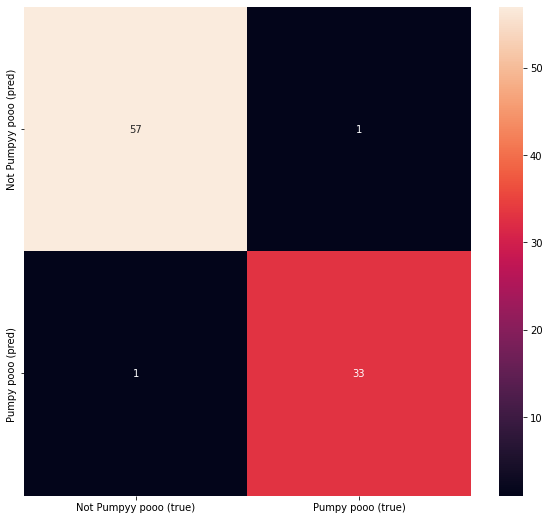

In [25]:
# CONTROL VALIDATION

y_pred = model.predict(x_val)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_cls)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

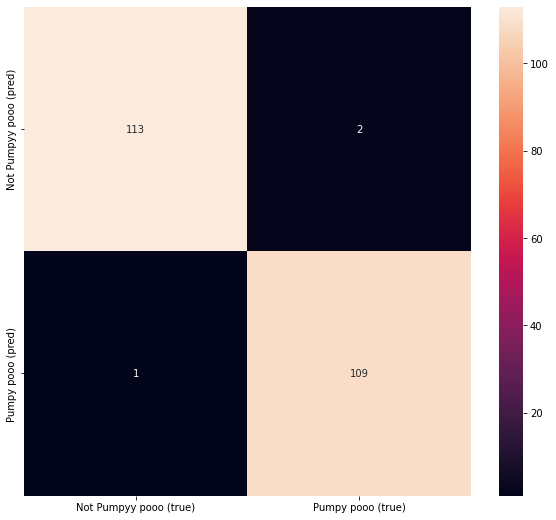

In [26]:
# TEST

y_pred2 = model.predict(x_test)
y_pred_cls2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
conf_mat2 = confusion_matrix(y_true2, y_pred_cls2)
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat2, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()

In [ ]:
# os.remove('/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена/Screenshot_520.png')

Predict: its Pumpy pooo
Probability is: 99.98500061035156%


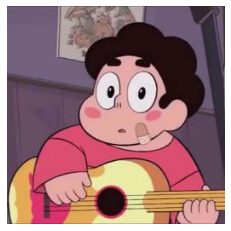

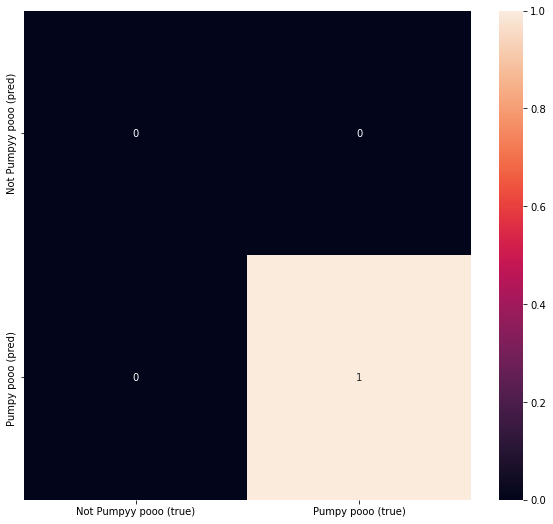

[[1.5291349e-04 9.9984705e-01]]


In [29]:
# URL IMAGE WORK

# Pumpy pooo
# https://c-cl.cdn.smule.com/rs-s87/arr/f8/65/e4b2a575-fbf4-4611-8f10-643c4b94bac6.jpg
# https://media.myshows.me/shows/1920/c/19/c19d86c712121a60f9ad75979d5860f7.jpg
# https://slovnet.ru/wp-content/uploads/2018/08/1-29.jpg  # dark bg

# Not Pumpyy pooo
# https://cdni.russiatoday.com/rbthmedia/images/2020.12/article/5feb853a85600a4a470fb151.jpg 


def get_check():
    global img_size

    fd = urlopen("https://c-cl.cdn.smule.com/rs-s87/arr/f8/65/e4b2a575-fbf4-4611-8f10-643c4b94bac6.jpg")

    # print(type(fd))  # debag
    image_file = io.BytesIO(fd.read())
    img = Image.open(image_file)
    img_arr = np.array(img)
    img_arr[20,30]
    plt.axis('off')
    # 

    # print(img_arr.shape)  # debag

    img_arr = cv2.resize(img_arr, dsize=(img_size, img_size))

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    plt.imshow(img_arr)  # debag
    
    # plt.savefig("/content/drive/MyDrive/steven/Стивен из вселенной Стивена и международная космическая станция/Стивен из вселенной Стивена/Screenshot_520.png")


    img_arr = img_arr.reshape(-1, img_size, img_size, 3)
    img_arr = img_arr/255

    # print(img_arr.shape)  # debag
    # print(img_arr[0])  # debag
    return img_arr


true = 'Steven'
# true = 'ISS'

y_pred = model.predict(get_check())
y_pred_cls = np.argmax(y_pred, axis=1)

if true == 'Steven':
    y_true = [1] 
elif true == 'ISS':
    y_true = [0]
if y_true == y_pred_cls:
    print(f'Predict: its {classes[y_pred_cls[0]]}')
    print(f'Probability is: {round(np.amax([item * 100 for item in y_pred]), 3)}%')
else:
    print(f'Error. Its not {true}')
    print("y_pred = ", y_pred * 100)


conf_mat = confusion_matrix(y_true, y_pred_cls, labels=[0, 1])
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(conf_mat, annot=True, fmt='.0f')
ax.set_xticklabels([item + ' (true)' for item in classes])
ax.set_yticklabels([item + ' (pred)' for item in classes])
plt.show()
print(y_pred)


# cv2.resize(img_arr, dsize=(img_size, img_size))
# need to solve this problem!!!!!!!!!!